<h1>Gaussian Naive Bayes Classifier</h1>

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import norm

In [3]:
class GaussianNaiveBayes:
    #split the dataset in subsets by classes
    def separate_by_classes(self, X, y):
        cls, counts = np.unique(y, return_counts=True)
        self.classes = cls
        self.class_freq = dict(zip(cls, counts))
        subsets = dict()
        for i in range(len(y)):
            feature_vec = X[i]
            class_val = y[i]
            if class_val not in subsets:
                subsets[class_val] = list()
            subsets[class_val].append(feature_vec)
        return subsets
    
    #calculate for every class the mean and standart deviation for every col
    def fit(self, X, y):
        subsets_X = self.separate_by_classes(X, y)
        self.means = {}
        self.std = {}
        for class_type in self.classes:
            self.means[class_type] = np.mean(subsets_X[class_type], axis=0)
            self.std[class_type] = np.std(subsets_X[class_type], axis=0)
            
    #calculates the class prob using gaussian distribution function (Likelihoods)
    def calc_prob(self, x, mean, stdev):
        exponent = math.exp(-((x - mean)**2 / (2 * stdev ** 2)))
        return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
    
    #calculate probabilities for each class (for simplification: no evidence used)
    def predict_prob(self, X):
        self.class_prob = {cls: math.log(self.class_freq[cls]/len(X), math.e) for cls in self.classes}
        for cls in self.classes:
            for i in range(len(self.means)):
                self.class_prob[cls] += math.log(self.calc_prob(X[i], self.means[cls][i], self.std[cls][i]), math.e)
        return self.class_prob
    
    # predict the class of a expample
    def predict(self, X):
        pred = []
        for x in X:
            pred_class = None
            max_prob = 0
            for cls, prob in self.predict_prob(x).items():
                if prob>max_prob:
                    max_prob = prob
                    pred_class = cls
            pred.append(pred_class)
        return pred
    
    # calculate accuracy of prediction
    def accuracy(self, y_hat, y):
        right = 0
        for i in range(len(y)):
            if y[i] == y_hat[i]:
                right += 1
        return right/len(y)

<h1>Iris Data</h1>

In [10]:
data = pd.read_csv('iris.data', header=None)
print(data.head())
X = data.drop([4], axis=1)
X = X.to_numpy()
y = data[[4]]
y = y.squeeze()

#convert strings to ints
y, real = pd.factorize(y)

#split data (test: 1/3, train: 2/3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

#GNB classifier
GNB_clf = GaussianNaiveBayes()
GNB_clf.fit(X_train, y_train)
pred = GNB_clf.predict(X_test)
acc = GNB_clf.accuracy(pred, y_test)

print('Accuracy GNB classifier: {:.2f}%'.format(acc*100))

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
Accuracy GNB classifier: 80.00%


In [11]:
#important for plots; saving it in a dict
mean_dict_iris = GNB_clf.means
std_dict_iris = GNB_clf.std

<h1>Seed Data</h1>

In [16]:
data = pd.read_csv('seeds.data', header=None)
print(data.head())
X = data.drop([7], axis=1)
X = X.to_numpy()
y = data[[7]]
y = y.squeeze()
y = y.to_numpy()

#split data (test: 1/3, train: 2/3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

#GNB classifier
GNB_clf = GaussianNaiveBayes()
GNB_clf.fit(X_train, y_train)
pred = GNB_clf.predict(X_test)
acc = GNB_clf.accuracy(pred, y_test)

print('Accuracy GNB classifier: {:.2f}%'.format(acc*100))

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
Accuracy GNB classifier: 97.14%


In [17]:
#important for plot
mean_dict_seed = GNB_clf.means
std_dict_seed = GNB_clf.std

<h1>Iris Plot</h1>

In [18]:
#reading in the data again; just to be sure it's all fine
df = pd.read_csv('iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
le = preprocessing.LabelEncoder()
le.fit(df['class'])
df['class'] = le.transform(df['class'])
X = df.drop(labels='class', axis=1)
y = df['class']
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


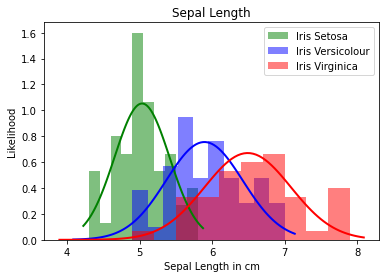

In [19]:
#plot for sepal length for each class
x1 = df.loc[df['class']==0, 'sepal_length']
x2 = df.loc[df['class']==1, 'sepal_length']
x3 = df.loc[df['class']==2, 'sepal_length']
kwargs = dict(alpha=0.5)
#plt.hist(x1, **kwargs, color='g', label='class 0')


plt.hist(x1, **kwargs, density=True, color='g', label='Iris Setosa')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[0][0]
std = std_dict_iris[0][0]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')


#plt.hist(x2, **kwargs, color='b', label='class 1')
plt.hist(x2, **kwargs, density=True, color='b', label='Iris Versicolour')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[1][0]
std = std_dict_iris[1][0]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')


#plt.hist(x3, **kwargs, color='r', label='class 2')
plt.hist(x3, **kwargs, density=True, color='r', label='Iris Virginica')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[2][0]
std = std_dict_iris[2][0]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')

plt.xlabel('Sepal Length in cm')
plt.ylabel('Likelihood')
plt.title('Sepal Length')
plt.legend()
plt.savefig('plots/sepal_length')
plt.show()

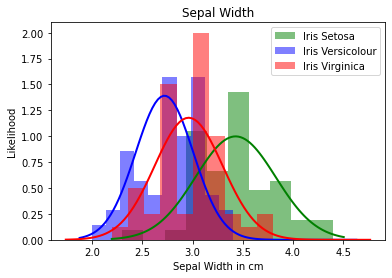

In [20]:
#plot for sepal width for each class
x1 = df.loc[df['class']==0, 'sepal_width']
x2 = df.loc[df['class']==1, 'sepal_width']
x3 = df.loc[df['class']==2, 'sepal_width']
#plt.hist(x1, **kwargs, color='g', label='class 0')
plt.hist(x1, **kwargs, density=True, color='g', label='Iris Setosa')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[0][1]
std = std_dict_iris[0][1]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')


#plt.hist(x2, **kwargs, color='b', label='class 1')
plt.hist(x2, **kwargs, density=True, color='b', label='Iris Versicolour')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[1][1]
std = std_dict_iris[1][1]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')

#plt.hist(x3, **kwargs, color='r', label='class 2')
plt.hist(x3, **kwargs, density=True, color='r', label='Iris Virginica')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[2][1]
std = std_dict_iris[2][1]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')

plt.xlabel('Sepal Width in cm')
plt.ylabel('Likelihood')
plt.title('Sepal Width')
plt.legend()
plt.savefig('plots/sepal_width')
plt.show()

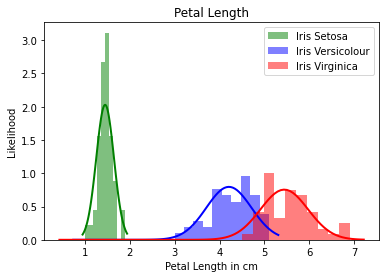

In [21]:
#plot for petal length for each class
x1 = df.loc[df['class']==0, 'petal_length']
x2 = df.loc[df['class']==1, 'petal_length']
x3 = df.loc[df['class']==2, 'petal_length']
#plt.hist(x1, **kwargs, color='g', label='class 0')
plt.hist(x1, **kwargs, density=True, color='g', label='Iris Setosa')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[0][2]
std = std_dict_iris[0][2]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')

#plt.hist(x2, **kwargs, color='b', label='class 1')
plt.hist(x2, **kwargs, density=True, color='b', label='Iris Versicolour')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[1][2]
std = std_dict_iris[1][2]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')

#plt.hist(x3, **kwargs, color='r', label='class 2')
plt.hist(x3, **kwargs, density=True, color='r', label='Iris Virginica')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[2][2]
std = std_dict_iris[2][2]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')

plt.title('Petal Length')
plt.xlabel('Petal Length in cm')
plt.ylabel('Likelihood')
plt.legend()
plt.savefig('plots/petal_length')
plt.show()

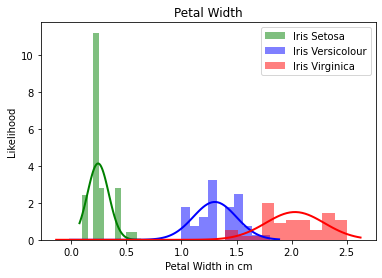

In [22]:
#plot for petal width for each class
x1 = df.loc[df['class']==0, 'petal_width']
x2 = df.loc[df['class']==1, 'petal_width']
x3 = df.loc[df['class']==2, 'petal_width']
#plt.hist(x1, **kwargs, color='g', label='class 0')
plt.hist(x1, **kwargs, density=True, color='g', label='Iris Setosa')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[0][3]
std = std_dict_iris[0][3]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')

#plt.hist(x2, **kwargs, color='b', label='class 1')
plt.hist(x2, **kwargs, density=True, color='b', label='Iris Versicolour')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[1][3]
std = std_dict_iris[1][3]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')

#plt.hist(x3, **kwargs, color='r', label='class 2')
plt.hist(x3, **kwargs, density=True, color='r', label='Iris Virginica')
xmin, xmax = plt.xlim()
mu = mean_dict_iris[2][3]
std = std_dict_iris[2][3]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')

plt.title('Petal Width')
plt.xlabel('Petal Width in cm')
plt.ylabel('Likelihood')
plt.legend()
plt.savefig('plots/petal_width')
plt.show()

<h1>Seed plot</h1>

In [23]:
#reading in the data again; just to be sure
df = pd.read_csv('seeds.data', header=None)
df.columns = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coef', 'length_of_kernel_groove', 'class']
print(df.head())
X = df.drop(['class'], axis=1)
y = df[['class']]
print(df.info())

    area  perimeter  compactness  length_of_kernel  width_of_kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   asymmetry_coef  length_of_kernel_groove  class  
0           2.221                    5.220      1  
1           1.018                    4.956      1  
2           2.699                    4.825      1  
3           2.259                    4.805      1  
4           1.355                    5.175      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    flo

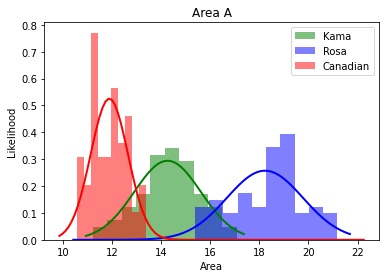

In [24]:
#plot for area for each class
x1 = df.loc[df['class']==1, 'area']
x2 = df.loc[df['class']==2, 'area']
x3 = df.loc[df['class']==3, 'area']
kwargs = dict(alpha=0.5)
#plt.hist(x1, **kwargs, color='g', label='class 0')

plt.hist(x1, **kwargs, density=True, color='g', label='Kama')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[1][0]
std = std_dict_seed[1][0]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')

plt.hist(x2, **kwargs, density=True, color='b', label='Rosa')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[2][0]
std = std_dict_seed[2][0]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')


plt.hist(x3, **kwargs, density=True, color='r', label='Canadian')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[3][0]
std = std_dict_seed[3][0]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')
plt.title('Area A')
plt.xlabel('Area')
plt.ylabel('Likelihood')
plt.legend()
plt.savefig('plots/area')
plt.show()

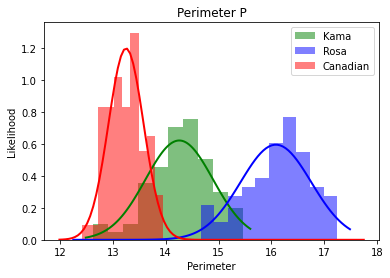

In [25]:
#plot for perimeter for each class
x1 = df.loc[df['class']==1, 'perimeter']
x2 = df.loc[df['class']==2, 'perimeter']
x3 = df.loc[df['class']==3, 'perimeter']
kwargs = dict(alpha=0.5)
#plt.hist(x1, **kwargs, color='g', label='class 0')

plt.hist(x1, **kwargs, density=True, color='g', label='Kama')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[1][1]
std = std_dict_seed[1][1]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')

plt.hist(x2, **kwargs, density=True, color='b', label='Rosa')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[2][1]
std = std_dict_seed[2][1]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')


plt.hist(x3, **kwargs, density=True, color='r', label='Canadian')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[3][1]
std = std_dict_seed[3][1]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')
plt.title('Perimeter P')
plt.xlabel('Perimeter')
plt.ylabel('Likelihood')
plt.legend()
plt.savefig('plots/perimeter')
plt.show()

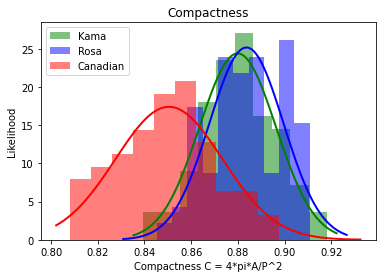

In [26]:
#plot for comptactness for each class
x1 = df.loc[df['class']==1, 'compactness']
x2 = df.loc[df['class']==2, 'compactness']
x3 = df.loc[df['class']==3, 'compactness']
kwargs = dict(alpha=0.5)
#plt.hist(x1, **kwargs, color='g', label='class 0')

plt.hist(x1, **kwargs, density=True, color='g', label='Kama')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[1][2]
std = std_dict_seed[1][2]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')

plt.hist(x2, **kwargs, density=True, color='b', label='Rosa')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[2][2]
std = std_dict_seed[2][2]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')


plt.hist(x3, **kwargs, density=True, color='r', label='Canadian')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[3][2]
std = std_dict_seed[3][2]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')
plt.title('Compactness')
plt.xlabel('Compactness C = 4*pi*A/P^2')
plt.ylabel('Likelihood')
plt.legend()
plt.savefig('plots/compactness')
plt.show()

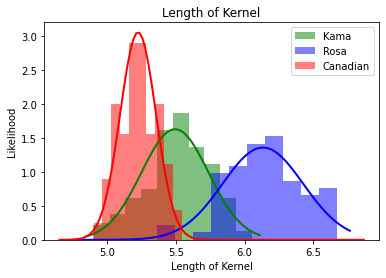

In [27]:
#plot for length of kernel for each class
x1 = df.loc[df['class']==1, 'length_of_kernel']
x2 = df.loc[df['class']==2, 'length_of_kernel']
x3 = df.loc[df['class']==3, 'length_of_kernel']
kwargs = dict(alpha=0.5)
#plt.hist(x1, **kwargs, color='g', label='class 0')

plt.hist(x1, **kwargs, density=True, color='g', label='Kama')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[1][3]
std = std_dict_seed[1][3]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')

plt.hist(x2, **kwargs, density=True, color='b', label='Rosa')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[2][3]
std = std_dict_seed[2][3]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')


plt.hist(x3, **kwargs, density=True, color='r', label='Canadian')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[3][3]
std = std_dict_seed[3][3]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')
plt.title('Length of Kernel')
plt.xlabel('Length of Kernel')
plt.ylabel('Likelihood')
plt.legend()
plt.savefig('plots/length_of_kernel')
plt.show()

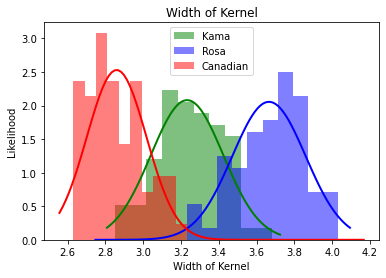

In [28]:
#plot for width of kernel for each class
x1 = df.loc[df['class']==1, 'width_of_kernel']
x2 = df.loc[df['class']==2, 'width_of_kernel']
x3 = df.loc[df['class']==3, 'width_of_kernel']
kwargs = dict(alpha=0.5)
#plt.hist(x1, **kwargs, color='g', label='class 0')

plt.hist(x1, **kwargs, density=True, color='g', label='Kama')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[1][4]
std = std_dict_seed[1][4]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')

plt.hist(x2, **kwargs, density=True, color='b', label='Rosa')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[2][4]
std = std_dict_seed[2][4]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')


plt.hist(x3, **kwargs, density=True, color='r', label='Canadian')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[3][4]
std = std_dict_seed[3][4]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')
plt.title('Width of Kernel')
plt.xlabel('Width of Kernel')
plt.ylabel('Likelihood')
plt.legend()
plt.savefig('plots/kernel_width')
plt.show()

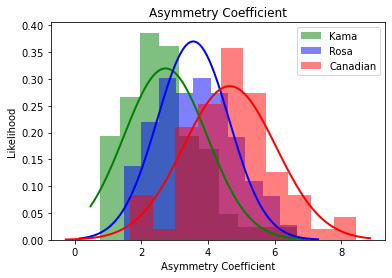

In [29]:
#plot for asymmetry coefficient for each class
x1 = df.loc[df['class']==1, 'asymmetry_coef']
x2 = df.loc[df['class']==2, 'asymmetry_coef']
x3 = df.loc[df['class']==3, 'asymmetry_coef']
kwargs = dict(alpha=0.5)
#plt.hist(x1, **kwargs, color='g', label='class 0')

plt.hist(x1, **kwargs, density=True, color='g', label='Kama')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[1][5]
std = std_dict_seed[1][5]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')

plt.hist(x2, **kwargs, density=True, color='b', label='Rosa')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[2][5]
std = std_dict_seed[2][5]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')


plt.hist(x3, **kwargs, density=True, color='r', label='Canadian')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[3][5]
std = std_dict_seed[3][5]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')
plt.title('Asymmetry Coefficient')
plt.xlabel('Asymmetry Coefficient')
plt.ylabel('Likelihood')
plt.legend()
plt.savefig('plots/assymetry_coef')
plt.show()

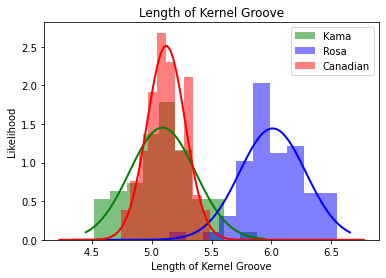

In [30]:
#plot for length of kernel_groove for each class
x1 = df.loc[df['class']==1, 'length_of_kernel_groove']
x2 = df.loc[df['class']==2, 'length_of_kernel_groove']
x3 = df.loc[df['class']==3, 'length_of_kernel_groove']
kwargs = dict(alpha=0.5)
#plt.hist(x1, **kwargs, color='g', label='class 0')

plt.hist(x1, **kwargs, density=True, color='g', label='Kama')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[1][6]
std = std_dict_seed[1][6]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='g')

plt.hist(x2, **kwargs, density=True, color='b', label='Rosa')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[2][6]
std = std_dict_seed[2][6]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='b')


plt.hist(x3, **kwargs, density=True, color='r', label='Canadian')
xmin, xmax = plt.xlim()
mu = mean_dict_seed[3][6]
std = std_dict_seed[3][6]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color='r')
plt.title('Length of Kernel Groove')
plt.xlabel('Length of Kernel Groove')
plt.ylabel('Likelihood')
plt.legend()
plt.savefig('plots/lenth_of_kernel_groove')
plt.show()